## Image classification on the Cats and Dogs dataset


Classify images into two categories(Cat vs Dog) using CNN model with data augmentation using tensorflow library.

#### Data
The cat vs dog image dateset is downloaded from the kaggle website - 
https://www.kaggle.com/c/dogs-vs-cats/data

### Import libraries

In [1]:
import os
import random
import numpy as np
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
np.random.seed(4)
random.seed(7)
tf.random.set_random_seed(10)

### Analyze Data

In [3]:
SOURCE_BASE_DIR = 'data/cat_dog_original'
SOURCE_TRAIN_DIR  = os.path.join(SOURCE_BASE_DIR, 'train')

BASE_DIR = "data/cats_and_dogs"
TRAIN_DIR = os.path.join(BASE_DIR, 'train')
VALID_DIR = os.path.join(BASE_DIR, 'valid')
TEST_DIR = os.path.join(BASE_DIR, 'test')

TRAINING_CATS_DIR = os.path.join(TRAIN_DIR, 'cats')
VALID_CATS_DIR = os.path.join(VALID_DIR, 'cats')
TESTING_CATS_DIR  = os.path.join(TEST_DIR, 'cats')

TRAINING_DOGS_DIR = os.path.join(TRAIN_DIR, 'dogs')
VALID_DOGS_DIR =  os.path.join(VALID_DIR, 'dogs')
TESTING_DOGS_DIR =  os.path.join(TEST_DIR, 'dogs')

### Split data in the training and validation set

```
from importlib import reload # reload 
reload(dataUtils)
```

In [4]:
from utils import dataUtils
from importlib import reload # reload 
reload(dataUtils)

split_size = 0.1

dataUtils.splitDataByCategory(SOURCE_TRAIN_DIR, TRAINING_CATS_DIR, VALID_CATS_DIR, TESTING_CATS_DIR, 'cat', split_size)
dataUtils.splitDataByCategory(SOURCE_TRAIN_DIR, TRAINING_DOGS_DIR, VALID_DOGS_DIR, TESTING_DOGS_DIR, 'dog', split_size)

In [5]:
# As a sanity check, count the number of images in each set
print('total training cat images:',len(os.listdir(TRAINING_CATS_DIR)))
print('total training dog images:',len(os.listdir(TRAINING_DOGS_DIR)))
print('total validation cat images:',len(os.listdir(VALID_CATS_DIR)))
print('total validation dog images:',len(os.listdir(VALID_DOGS_DIR)))
print('total test cat images:',len(os.listdir(TESTING_CATS_DIR)))
print('total test dog images:',len(os.listdir(TESTING_DOGS_DIR)))

total training cat images: 10000
total training dog images: 10000
total validation cat images: 1250
total validation dog images: 1250
total test cat images: 1250
total test dog images: 1250


In [6]:
# print the name of the cat images in the training dataset
train_cat_names = os.listdir(TRAINING_CATS_DIR)
print(train_cat_names[:6])

# print the name of the dog images in the training dataset
train_dog_names = os.listdir(TRAINING_DOGS_DIR)
print(train_dog_names[:5])

# print the name of the cat images in the validation dataset
valid_cat_names = os.listdir(VALID_CATS_DIR)
print(valid_cat_names[:5])

# print the name of the dog images in the validation dataset
valid_dog_names = os.listdir(VALID_DOGS_DIR)
print(valid_dog_names[:5])

['cat.3274.jpg', 'cat.8025.jpg', 'cat.6654.jpg', 'cat.8384.jpg', 'cat.10280.jpg', 'cat.5733.jpg']
['dog.7108.jpg', 'dog.4222.jpg', 'dog.12398.jpg', 'dog.6075.jpg', 'dog.4931.jpg']
['cat.3885.jpg', 'cat.4105.jpg', 'cat.4700.jpg', 'cat.7870.jpg', 'cat.10697.jpg']
['dog.8337.jpg', 'dog.5629.jpg', 'dog.8245.jpg', 'dog.10814.jpg', 'dog.6840.jpg']


### Display images from the training set

In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.preprocessing import image

nrows=4
ncols=4

fig = plt.gcf()
fig.set_size_inches(nrows*4, ncols*4)
next_cat_pic_list = [os.path.join(TRAINING_CATS_DIR, fname) for fname in train_cat_names[0:8]]
next_dog_pic_list = [os.path.join(TRAINING_DOGS_DIR, fname) for fname in train_dog_names[0:8]]

for i, img_path in enumerate(next_cat_pic_list+next_dog_pic_list):
    sp = plt.subplot(nrows, ncols, i+1)
    sp.axis('off')
    
    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()

Using TensorFlow backend.


<Figure size 1600x1600 with 16 Axes>

### Build CNN Model

In [8]:
img_size = 150

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation = 'relu', input_shape=(img_size, img_size, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
    
])

W0824 19:46:34.624385 139644881671552 deprecation.py:506] From /home/agoel/anaconda3/envs/ML/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

### Compile the model

In [10]:
model.compile(loss='binary_crossentropy', optimizer=RMSprop(lr=1e-3), metrics=['accuracy'])

W0824 19:46:36.718093 139644881671552 deprecation.py:323] From /home/agoel/anaconda3/envs/ML/lib/python3.7/site-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


### Data preprocessing

Please note that we have performed data augmentation on training dataset

In [11]:
img_size = 150

# Rescale the image pixes to range between 0 and 1
train_datagen = ImageDataGenerator(rescale = 1/255,
                            rotation_range=40,
                            width_shift_range=0.2,
                            height_shift_range=0.2,
                            shear_range=0.2,
                            zoom_range=0.2,
                            horizontal_flip=True,
                            fill_mode='nearest')

valid_datagen = ImageDataGenerator(rescale = 1/255,
                            rotation_range=40,
                            width_shift_range=0.2,
                            height_shift_range=0.2,
                            shear_range=0.2,
                            zoom_range=0.2,
                            horizontal_flip=True,
                            fill_mode='nearest')

train_batches = train_datagen.flow_from_directory(TRAIN_DIR,
                                                  batch_size=64,
                                                  class_mode='binary',
                                                  target_size=(img_size, img_size))

valid_batches = valid_datagen.flow_from_directory(VALID_DIR,
                                                 batch_size=50,
                                                 class_mode='binary',
                                                 target_size=(img_size, img_size))

Found 20000 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


### Train the Model

In [12]:
history = model.fit_generator(train_batches,
                             steps_per_epoch=train_batches.samples/train_batches.batch_size,
                             validation_data=valid_batches,
                             validation_steps=valid_batches.samples/valid_batches.batch_size,
                             epochs=10,
                             verbose=1)

Epoch 1/10
313/312 [==============================] - 165s 529ms/step - loss: 0.6758 - acc: 0.6105 - val_loss: 0.6367 - val_acc: 0.6388
Epoch 2/10
313/312 [==============================] - 163s 522ms/step - loss: 0.6057 - acc: 0.6734 - val_loss: 0.5840 - val_acc: 0.6820
Epoch 3/10
313/312 [==============================] - 162s 519ms/step - loss: 0.5700 - acc: 0.7025 - val_loss: 0.5586 - val_acc: 0.7324
Epoch 4/10
313/312 [==============================] - 162s 519ms/step - loss: 0.5464 - acc: 0.7232 - val_loss: 0.5572 - val_acc: 0.7112
Epoch 5/10
313/312 [==============================] - 162s 518ms/step - loss: 0.5324 - acc: 0.7361 - val_loss: 0.5605 - val_acc: 0.7120
Epoch 6/10
313/312 [==============================] - 162s 516ms/step - loss: 0.5185 - acc: 0.7427 - val_loss: 0.5020 - val_acc: 0.7536
Epoch 7/10
313/312 [==============================] - 162s 516ms/step - loss: 0.5051 - acc: 0.7569 - val_loss: 0.4744 - val_acc: 0.7772
Epoch 8/10
313/312 [============================

### Viusalize accuracy and loss curves

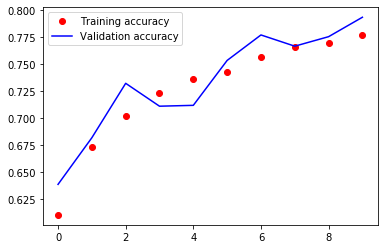

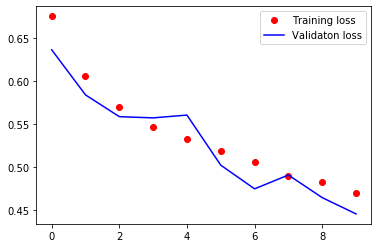

<Figure size 432x288 with 0 Axes>

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'ro', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.legend()
plt.figure()
#plt.savefig('static/acc_cnn_dataAug_full_data.png')
plt.clf()

plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validaton loss')
plt.legend()
plt.figure()
#plt.savefig('static/loss_cnn_dataAug_full_data.png')
plt.clf()

### Visualizing intermediate layers

/home/agoel/anaconda3/envs/ML/lib/python3.7/site-packages/ipykernel_launcher.py:49: RuntimeWarning: invalid value encountered in true_divide


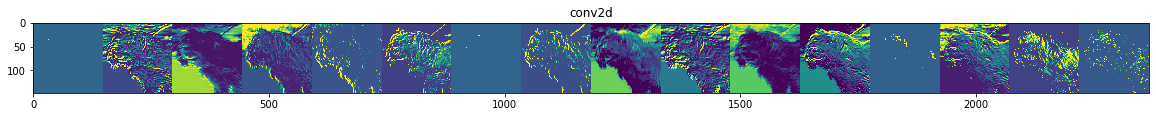

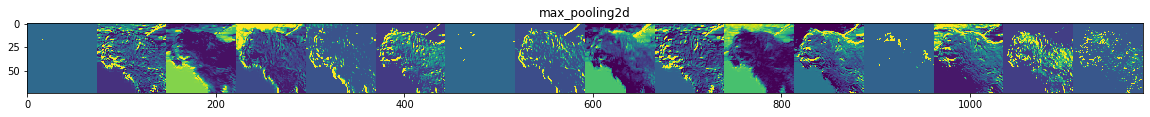

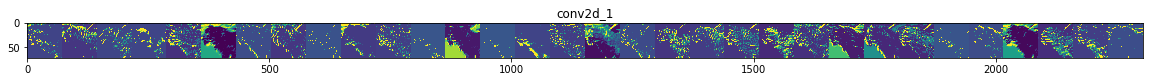

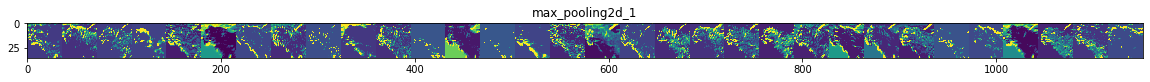

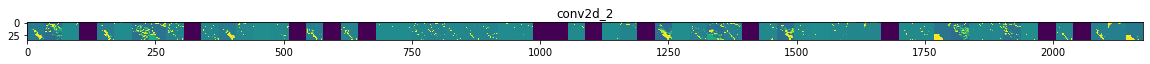

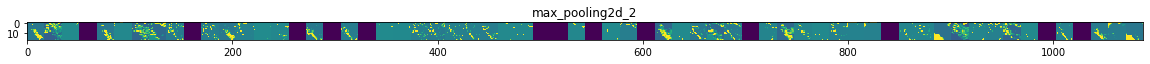

In [18]:
import numpy as np
import random
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import img_to_array, load_img

img_size = 150

# Intermediate representation of all the layers after the first layer
successive_outputs = [layer.output for layer in model.layers]

# New visualization_model obtained from our previously trained model
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

# Let's prepare a random image from the training set
cats_img_files = [os.path.join(TRAINING_CATS_DIR, f) for f in train_cat_names]
dogs_img_files = [os.path.join(TRAINING_DOGS_DIR, f) for f in train_dog_names]

# randomly choose an image
img_path = random.choice(cats_img_files + dogs_img_files)

img = image.load_img(img_path, target_size = (img_size, img_size)) # PIL image
x = img_to_array(img) #Numpy array of shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # reshapes the image to (1, 150, 150, 3)

# Rescale the image by 1/255.
x /= 255

# Let's run the image through our nsuetwork, thus obtaining all intermediate representations for this image
successive_feature_maps = visualization_model.predict(x)

# Name of the layers, which we can use as part of the image plot
layer_names = [layer.name for layer in model.layers]

# Display the intermediate representation
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
    # feature_map has shape (1, size, size, n_features)
    if (len(feature_map.shape) == 4): #Just display it only for Conv2D and MaxPool layer, not fully-connected layers
        n_features = feature_map.shape[-1]  #Number of features/filters in feature map
        size = feature_map.shape[1]
        
        # tile our images in a matrix. 
        display_grid = np.zeros((size, size * n_features))  # display_grid (150, 150 * Num of filters)
        
        # Iterate through each feature/filter/channels
        for i in range(n_features):
            # Postprocess the feature
            x = feature_map[0, :, :, i] # ith filter
            x -= x.mean()
            x /= x.std()
            x *= 64
            x +=128
            x = np.clip(x, 0, 255).astype('uint8')
            # tile each filter into a big horizontal grid
            display_grid[:, i*size: (i+1) * size] = x
            
        # Display the grid
        scale = 20 / n_features
        plt.figure(figsize=(20,20))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid)

### Cleanup

Terminate the kernel and free up memory resources

In [ ]:
import os, signal
os.kill(os.getpid(), signal.SIGKILL)